## Opencv : Haar Cascade

- Data : [https://github.com/opencv/opencv/tree/master/data/haarcascades](https://github.com/opencv/opencv/tree/master/data/haarcascades)

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
face_detector = cv2.CascadeClassifier("../data/haarcascades/haarcascade_frontalface_default.xml")
face_img = cv2.imread("jjm.jpg")
faces = face_detector.detectMultiScale(face_img)

In [3]:
print(faces) # x1, y1, w, h

[[173  19 588 588]]


In [4]:
for f in faces:
    left = f[0]
    right = f[0] + f[2]
    top = f[1]
    bottom = f[1] + f[3]
    
    print(f"Left : {left} \t Right : {right} \t Top : {top} \t Bottom : {bottom}")
    cv2.rectangle(face_img, (left, top), (right, bottom), (0, 0, 255), 5)

Left : 173 	 Right : 761 	 Top : 19 	 Bottom : 607


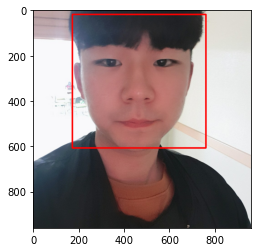

In [5]:
rgb_face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_face_img)

## Opencv : DNN

- Data : [https://github.com/sr6033/face-detection-with-OpenCV-and-DNN](https://github.com/sr6033/face-detection-with-OpenCV-and-DNN)

In [6]:
import dlib
import imutils
import cv2
import matplotlib.pyplot as plt

In [7]:
model_file = "../data/opencv_model/res10_300x300_ssd_iter_140000.caffemodel"
config_file = "../data/opencv_model/deploy.prototxt.txt"

In [8]:
face_detector = cv2.dnn.readNetFromCaffe(config_file, model_file)
face_img = cv2.imread("jjm.jpg")
face_img = imutils.resize(face_img, width=300) # 224×224, 227×227, 299×299

frame_height, frame_width = face_img.shape[:2]

blob = cv2.dnn.blobFromImage(face_img, 
                             scalefactor=1.0, 
                             size = (frame_height, frame_width), 
                             mean = [104, 117, 123], 
                             swapRB = False, 
                             crop = False)

In [9]:
face_detector.setInput(blob)
faces = face_detector.forward()

bboxes = []

for i in range(faces.shape[2]):
    confidence = faces[0, 0, i, 2]
    if confidence > 0.99:
        left = int(faces[0, 0, i, 3] * frame_width)
        top = int(faces[0, 0, i, 4] * frame_height)
        right = int(faces[0, 0, i, 5] * frame_width)
        bottom = int(faces[0, 0, i, 6] * frame_height)
        
        print(f"Left : {left} \t Right : {right} \t Top : {top} \t Bottom : {bottom} \t Confidence : {confidence}")
        cv2.rectangle(face_img, (left, top), (right, bottom), (0, 0, 255), 5)

Left : 65 	 Right : 219 	 Top : 4 	 Bottom : 196 	 Confidence : 0.999115526676178


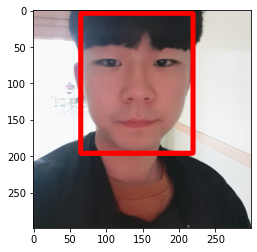

In [10]:
rgb_face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_face_img)

## Dlib : hog + svm

In [11]:
import dlib
import cv2
import matplotlib.pyplot as plt

In [12]:
face_detector = dlib.get_frontal_face_detector()
face_img = cv2.imread("jjm.jpg")
faces = face_detector(face_img)

In [13]:
for f in faces:
    left = f.left()
    right = f.right()
    top = f.top()
    bottom = f.bottom()
    
    print(f"Left : {left} \t Right : {right} \t Top : {top} \t Bottom : {bottom}")
    cv2.rectangle(face_img, (f.left(), f.top()), (f.right(), f.bottom()), (0, 0, 255), 5)

Left : 237 	 Right : 683 	 Top : 138 	 Bottom : 584


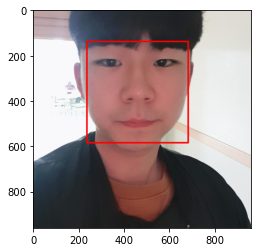

In [14]:
rgb_face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_face_img)

## Dlib : CNN

- Data : [https://github.com/davisking/dlib-models](https://github.com/davisking/dlib-models)

In [15]:
import dlib
import cv2
import matplotlib.pyplot as plt

In [16]:
face_detector = dlib.cnn_face_detection_model_v1("../data/dlib_model/mmod_human_face_detector.dat")
face_img = cv2.imread("jjm.jpg")
faces = face_detector(face_img)

In [17]:
for f in faces:
    left = f.rect.left()
    right = f.rect.right()
    top = f.rect.top()
    bottom = f.rect.bottom()
    
    print(f"Left : {left} \t Right : {right} \t Top : {top} \t Bottom : {bottom}")
    cv2.rectangle(face_img, (f.rect.left(), f.rect.top()), (f.rect.right(), f.rect.bottom()), (0, 0, 255), 5)

Left : 184 	 Right : 673 	 Top : 79 	 Bottom : 568


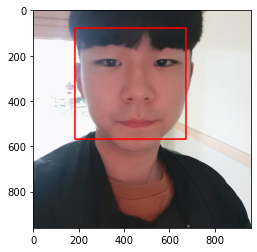

In [18]:
rgb_face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_face_img)